In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import platform
platform.system()

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
recipient = pd.read_csv('recipient.csv', encoding = 'CP949')
del recipient['통계년월']
del recipient['수급가구수']
recipient['통계시도군구명'] = recipient['통계시도명'] + " " +recipient['통계시군구명']
del recipient['통계시도명']
del recipient['통계시군구명']
recipient = recipient[['통계시도군구명', '수급자구분', '수급자수']]
recipient = recipient.groupby(['통계시도군구명'], sort= False).sum()
recipient

,수급자수
통계시도군구명,
서울특별시 종로구,5252
서울특별시 중구,5368
서울특별시 용산구,8445
서울특별시 성동구,9794
서울특별시 광진구,12036
...,...
경상남도 함양군,2367
경상남도 거창군,3434
경상남도 합천군,2332


In [7]:
population = pd.read_csv('population.csv', encoding = 'CP949')
population['통계시도군구명'] = population['통계시도명'] + ' ' + population['통계시군구명']
population

,통계시도명,통계시군구명,인구수,통계시도군구명
0,전국,소계,51849861,전국 소계
1,서울특별시,소계,9729107,서울특별시 소계
2,서울특별시,종로구,151290,서울특별시 종로구
3,서울특별시,중구,126171,서울특별시 중구
4,서울특별시,용산구,228670,서울특별시 용산구
...,...,...,...,...
242,경상남도,거창군,62179,경상남도 거창군
243,경상남도,합천군,45204,경상남도 합천군
244,제주특별자치도,소계,670989,제주특별자치도 소계
245,제주특별자치도,제주시,489405,제주특별자치도 제주시


In [8]:
data = pd.merge(recipient, population, how = 'left', on = '통계시도군구명')
data = data[['통계시도명', '통계시군구명', '통계시도군구명', '수급자수', '인구수']]
data

,통계시도명,통계시군구명,통계시도군구명,수급자수,인구수
0,서울특별시,종로구,서울특별시 종로구,5252,151290
1,서울특별시,중구,서울특별시 중구,5368,126171
2,서울특별시,용산구,서울특별시 용산구,8445,228670
3,서울특별시,성동구,서울특별시 성동구,9794,300889
4,서울특별시,광진구,서울특별시 광진구,12036,351350
...,...,...,...,...,...
224,경상남도,함양군,경상남도 함양군,2367,39637
225,경상남도,거창군,경상남도 거창군,3434,62179
226,경상남도,합천군,경상남도 합천군,2332,45204
227,제주특별자치도,제주시,제주특별자치도 제주시,20870,489405


In [13]:
data['수급자 비율'] = data['수급자수']/data['인구수'] * 100
data.to_csv('recipient_percent.csv', encoding = 'CP949')
data

,통계시도명,통계시군구명,통계시도군구명,수급자수,인구수,수급자 비율
0,서울특별시,종로구,서울특별시 종로구,5252,151290,3.471479
1,서울특별시,중구,서울특별시 중구,5368,126171,4.254543
2,서울특별시,용산구,서울특별시 용산구,8445,228670,3.693095
3,서울특별시,성동구,서울특별시 성동구,9794,300889,3.255021
4,서울특별시,광진구,서울특별시 광진구,12036,351350,3.425644
...,...,...,...,...,...,...
224,경상남도,함양군,경상남도 함양군,2367,39637,5.971693
225,경상남도,거창군,경상남도 거창군,3434,62179,5.522765
226,경상남도,합천군,경상남도 합천군,2332,45204,5.158836
227,제주특별자치도,제주시,제주특별자치도 제주시,20870,489405,4.264362


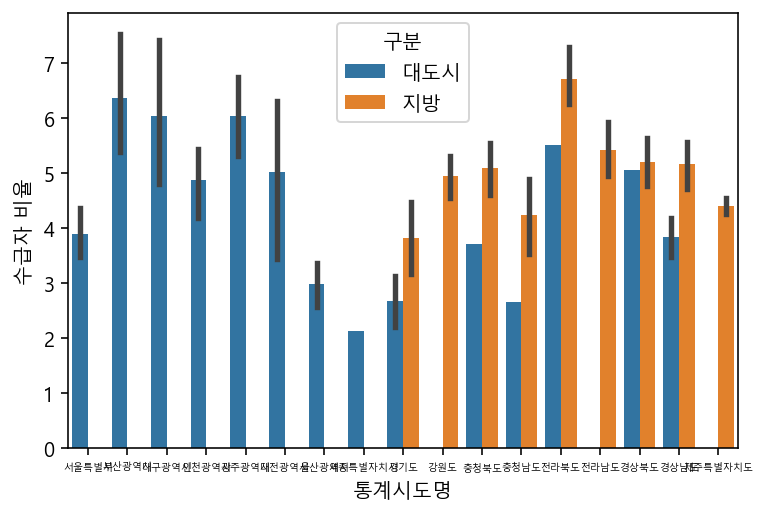

In [189]:
sns.barplot(
    data = data_final,
    x = '통계시도명',
    y = '수급자 비율',
    hue = '구분'
)

(4.0, 6.0)

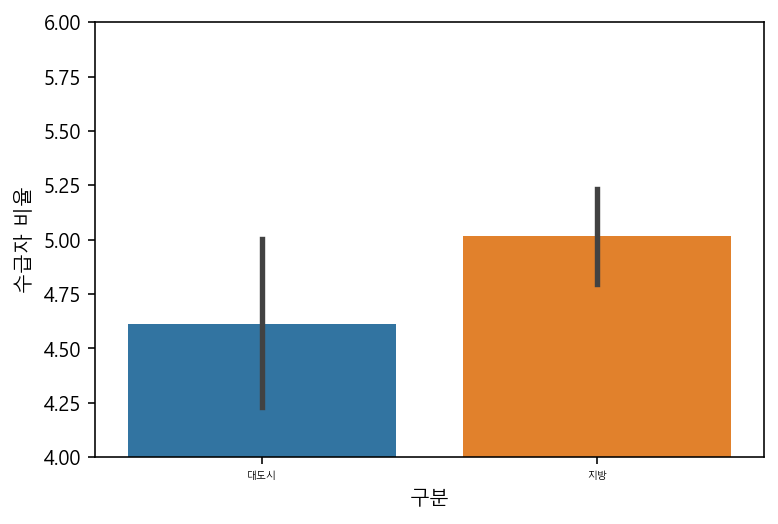

In [165]:
sns.barplot(
    data = data_final,
    x = '구분',
    y = '수급자 비율',
)
plt.ylim(4,6)